### K-Means Clustering: Iris Flowers

#### Preface

**Acknowledgements**

- https://www.youtube.com/watch?v=EItlUEPCIzM&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=14
- https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca

**Packages**

In [23]:
import pandas as pkg_pandas
import sklearn.preprocessing as pkg_preprocessing
import sklearn.datasets as pkg_datasets
import sklearn.cluster as pkg_cluster
import matplotlib.pyplot as pkg_plot

**Common**

In [24]:
%matplotlib inline

#### Initialization

**Load Data**

In [25]:
dataset = pkg_datasets.load_iris()
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [26]:
column_names = []
for feature_name in dataset.feature_names:
    column_name = feature_name.replace(' ', '_').replace('(','').replace(')','')
    column_names.append(column_name)

print("\nFeature Names = {}\nTarget Names = {}\nColumn Names={}".format(\
    dataset.feature_names, dataset.target_names, column_names))


Feature Names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names = ['setosa' 'versicolor' 'virginica']
Column Names=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']


In [27]:
dataset_df = pkg_pandas.DataFrame(dataset.data, columns=column_names)
dataset_df['flower_number'] = dataset.target
dataset_df['flower_name'] = dataset_df['flower_number'].apply(lambda fnum: dataset.target_names[fnum])
dataset_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,flower_number,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [28]:
column_name_x = column_names[2]
column_name_y = column_names[3]
column_name_x, column_name_y

('petal_length_cm', 'petal_width_cm')

**Plot Data**

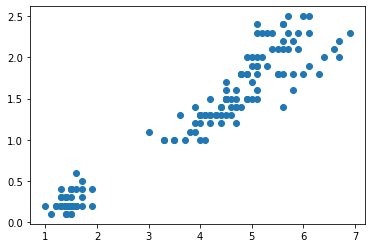

In [29]:
pkg_plot.scatter(dataset_df[column_name_x], dataset_df[column_name_y])

#### Optimal Cluster Count

**Notes**:
- Optimal no. of clusters is not very easily identifable from the plot/picture, so use elbow method

In [30]:
# Sum of Square Errors (sse)
sse = []

cluster_count_range = range(1, int(len(dataset_df)/2))

for cluster_count in cluster_count_range:
    kmt = pkg_cluster.KMeans(n_clusters=cluster_count)
    kmt.fit(dataset_df[[column_name_x,column_name_y]])
    sse.append(kmt.inertia_)

sse[0:5]

[550.8953333333333,
 86.39021984551397,
 31.371358974358976,
 19.483000899685113,
 13.916908757908757]

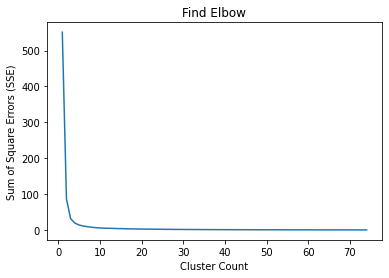

In [31]:
pkg_plot.title("Find Elbow")
pkg_plot.xlabel("Cluster Count")
pkg_plot.ylabel("Sum of Square Errors (SSE)")
pkg_plot.plot(cluster_count_range, sse)

#### Process

**Cluster Data**

In [32]:
cluster_count = 2 # Based on the elbow graph above

km = pkg_cluster.KMeans(n_clusters=cluster_count)
predicted_clusters = km.fit_predict(dataset_df[[column_name_x, column_name_y]])
dataset_df["cluster_number"] = predicted_clusters
dataset_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,flower_number,flower_name,cluster_number
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


**Plot Clusters**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


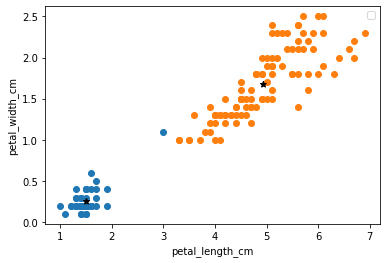

In [33]:
pkg_plot.xlabel(column_name_x)
pkg_plot.ylabel(column_name_y)
pkg_plot.legend()

for i in range(cluster_count):
    cluster_df = dataset_df[dataset_df["cluster_number"] == i]
    pkg_plot.scatter(cluster_df[column_name_x], cluster_df[column_name_y], marker='o')    
    pkg_plot.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*')